In [ ]:
from google.colab import drive
import os, shutil
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/Dog_and_Cat"
%cd /content/gdrive/My Drive/Kaggle/Dog_and_Cat

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle/Dog_and_Cat


In [ ]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

train.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
original_dataset_dir = '/content/gdrive/MyDrive/Kaggle/Dog_and_Cat'

base_dir = '/content/gdrive/MyDrive/Kaggle/Dog_and_Cat/cats_and_dogs_small'  # will create a dir inside the main folder

#  os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#os.mkdir(train_cats_dir)
#os.mkdir(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#os.mkdir(validation_cats_dir)
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#os.mkdir(test_cats_dir)
#os.mkdir(test_dogs_dir)

In [ ]:
# !unzip '/content/gdrive/MyDrive/Kaggle/Dog_and_Cat/train.zip' #unzip train zip it  will create a train folder

In [ ]:
# !unzip '/content/gdrive/MyDrive/Kaggle/Dog_and_Cat/test.zip' #unzip test zip it  will create a test folder

In [ ]:
train_unzip = '/content/gdrive/MyDrive/Kaggle/Dog_and_Cat/train'
test_unzip = '/content/gdrive/MyDrive/Kaggle/Dog_and_Cat/test'

In [ ]:
# For cats
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000) ]
# for fname in fnames:
#   src = os.path.join(train_unzip, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(train_unzip, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(train_unzip, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src, dst)

In [ ]:
# For dogs
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000) ]
# for fname in fnames:
#   src = os.path.join(train_unzip, fname)
#   dst = os.path.join(train_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000) ]
# for fname in fnames:
#   src = os.path.join(train_unzip, fname)
#   dst = os.path.join(validation_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000) ]
# for fname in fnames:
#   src = os.path.join(train_unzip, fname)
#   dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)


In [ ]:
# print('Total training cats {}'.format(len(os.listdir(train_cats_dir))))

# print('Total training dogs {}'.format(len(os.listdir(train_dogs_dir))))

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(128,3, activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(128,3, activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator  = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),  # resize all images to 150*150
    batch_size = 20,
    class_mode = 'binary' 
)

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
for data_batch, label_batch in train_generator:
  print('data batch shape: {}'.format(data_batch.shape))
  print('label batch shape: {}'.format(label_batch.shape))
  break  # also try witout break  it will print for everver so break is important

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps = 50)

In [ ]:
# save model

model.save('cats_and_dog_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1 )

plt.plot(epochs, acc, 'k*', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'k', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('% Acuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r*', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Los')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('% Loss')
plt.legend()


plt.show()

In [ ]:
# Using data Augmetation to decrease overfitting in normal model

datagen = ImageDataGenerator(rotation_range= 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,
                             fill_mode = 'nearest')


from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[5]   # selecting  one image to augment 

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)   # converts it to a numpy array with (150,150,3) shape

x = tf.expand_dims(x, axis=0)
x.shape

TensorShape([1, 150, 150, 3])

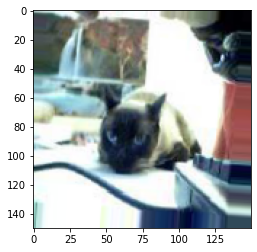

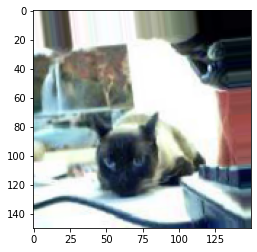

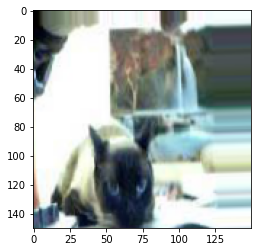

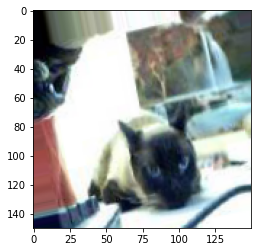

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1):    # generates image of randomly transformed images loops for ever so break needed at some point
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i = i + 1 
  if i%4 ==0:
    break
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2),
                                    tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2),
                                    tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2),
                                    tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate= 1e-4),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# using data aug generator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range= 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,
                             fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator  = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),  # resize all images to 150*150
    batch_size = 20,
    class_mode = 'binary' 
)

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 50
)

Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 25s 240ms/step - loss: 0.6943 - accuracy: 0.5121 - val_loss: 0.6720 - val_accuracy: 0.6940
Epoch 2/50
100/100 [==============================] - 22s 219ms/step - loss: 0.6907 - accuracy: 0.5224 - val_loss: 0.6426 - val_accuracy: 0.6820
Epoch 3/50
100/100 [==============================] - 20s 200ms/step - loss: 0.6811 - accuracy: 0.5677 - val_loss: 0.5974 - val_accuracy: 0.6760
Epoch 4/50
100/100 [==============================] - 26s 265ms/step - loss: 0.6715 - accuracy: 0.5770 - val_loss: 0.6298 - val_accuracy: 0.6550
Epoch 5/50
100/100 [==============================] - 20s 197ms/step - loss: 0.6538 - accuracy: 0.6216 - val_loss: 0.5664 - val_accuracy: 0.7020
Epoch 6/50
100/100 [==============================] - 20s 197ms/step - loss: 0.6433 - accuracy: 0.6299 - val_loss: 0.6982 - val_accuracy: 0.5350
Epoch 7/50
100/100 [==============================] - 26s 262ms/step - loss: 0.6281 - accuracy: 0.6435 - val_loss: 0.5497 - val_ac

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1 )

plt.plot(epochs, acc, 'k*', label = 'Training Accuracy After Augmentation and Dropout')
plt.plot(epochs, val_acc, 'k', label = 'Validation Accuracy after Augmentation and Dropout')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('% Acuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r*', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Los')
plt.title('Training and Validation Loss after Augmentation and Dropout')

plt.xlabel('Epochs')
plt.ylabel('% Loss')
plt.legend()


plt.show()

In [ ]:
# Using a Pretrained Convnet
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape= (150,150,3))

conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
# Feature extraction without data Augmentation

import os
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary'
  )
  i = 0
  for input_batch, label_batch in generator:
    feature_batch = conv_base.predict(input_batch)
    features[i*batch_size : (i+1)*batch_size] = feature_batch
    labels [ i*batch_size : (i+1)*batch_size] = label_batch
    i += 1 
    if i*batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
     

Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
validation_features.shape

(1000, 4, 4, 512)

In [ ]:
# need to flatten the input features before feeding into the dense network or can use tf.Flatten() layer in sequential model
train_features = np.reshape(train_features, (2000*4*4*512))
validation_features = np.reshape(validation_features, (1000*4*4*512))
test_features = np.reshape(test_features, (1000*4*4*512))

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256, activation='relu', input_shape = (4*4*512,)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])


model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])


history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size=20,
                    validation_data = (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.7011 - acc: 0.5768 - val_loss: 0.4679 - val_acc: 0.7970
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4689 - acc: 0.7765 - val_loss: 0.3494 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3761 - acc: 0.8314 - val_loss: 0.3317 - val_acc: 0.8530
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3206 - acc: 0.8596 - val_loss: 0.2809 - val_acc: 0.8920
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2802 - acc: 0.8930 - val_loss: 0.2840 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2599 - acc: 0.8934 - val_loss: 0.2400 - val_acc: 0.9130
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2598 - acc: 0.9031 - val_loss: 0.2394 - val_acc: 0.9030
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

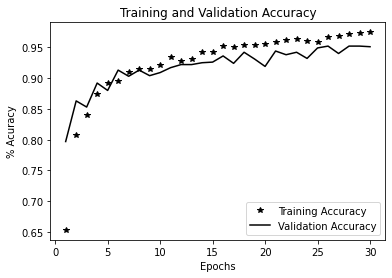

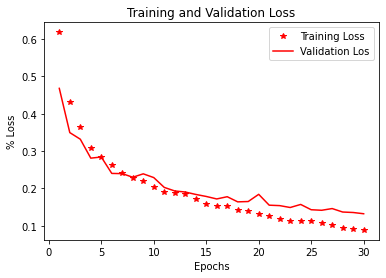

In [ ]:
import matplotlib.pyplot as plt

acc  = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1 )

plt.plot(epochs, acc, 'k*', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'k', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('% Acuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r*', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Los')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('% Loss')
plt.legend()


plt.show()

In [ ]:
# Feature extraction iwth Data Augmentation
model = tf.keras.models.Sequential([
                                    conv_base,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights {} before freezing the base model'.format(len(model.trainable_weights)))

This is the number of trainable weights 30 before freezing the base model


In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights {} AFTER freezing the base model'.format(len(model.trainable_weights)))

This is the number of trainable weights 4 AFTER freezing the base model


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range= 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True,
                             fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale= 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = 'binary')

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy']
              )

model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 126s 1s/step - loss: 1.8068 - accuracy: 0.5830 - val_loss: 0.7232 - val_accuracy: 0.6790
Epoch 2/30
100/100 [==============================] - 48s 483ms/step - loss: 0.4887 - accuracy: 0.7750 - val_loss: 0.2746 - val_accuracy: 0.8740
Epoch 3/30
100/100 [==============================] - 37s 373ms/step - loss: 0.4144 - accuracy: 0.8150 - val_loss: 0.3821 - val_accuracy: 0.8240
Epoch 4/30
100/100 [==============================] - 24s 237ms/step - loss: 0.4092 - accuracy: 0.8274 - val_loss: 0.2222 - val_accuracy: 0.9060
Epoch 5/30
100/100 [==============================] - 22s 221ms/step - loss: 0.3997 - accuracy: 0.8272 - val_loss: 0.2120 - val_accuracy: 0.9210
Epoch 6/30
100/100 [==============================] - 22s 218ms/step - loss: 0.3673 - accuracy: 0.8469 - val_loss: 0.2643 - val_accuracy: 0.9020
Epoch 7/30
100/100 [==============================] - 22s 217ms/step - loss: 0.3612 - accuracy: 0.8488 - val_loss: 0.2491 - val_accu

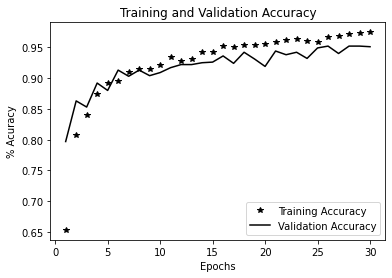

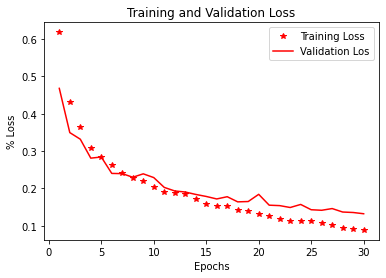

In [ ]:
import matplotlib.pyplot as plt

acc  = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1 )

plt.plot(epochs, acc, 'k*', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'k', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('% Acuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r*', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Los')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('% Loss')
plt.legend()


plt.show()


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
# all layer after 'block5_con1' will be trainable
conv_base.trainable  = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name =='block5_con1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['acc'])

model.fit_generator(train_generator,
                    steps_per_epoch = 100,
                    epochs = 30,
                    validation_data = validation_generator,
                    validation_steps = 50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 22s 218ms/step - loss: 0.3155 - acc: 0.8740 - val_loss: 0.1654 - val_acc: 0.9390
Epoch 2/30
100/100 [==============================] - 21s 211ms/step - loss: 0.2753 - acc: 0.8994 - val_loss: 0.1426 - val_acc: 0.9510
Epoch 3/30
100/100 [==============================] - 21s 213ms/step - loss: 0.2653 - acc: 0.8819 - val_loss: 0.1529 - val_acc: 0.9380
Epoch 4/30
100/100 [==============================] - 21s 213ms/step - loss: 0.2584 - acc: 0.8871 - val_loss: 0.1452 - val_acc: 0.9400
Epoch 5/30
100/100 [==============================] - 21s 213ms/step - loss: 0.2440 - acc: 0.8931 - val_loss: 0.1580 - val_acc: 0.9430
Epoch 6/30
100/100 [==============================] - 21s 212ms/step - loss: 0.2656 - acc: 0.8824 - val_loss: 0.1427 - val_acc: 0.9460
Epoch 7/30
100/100 [==============================] - 21s 212ms/step - loss: 0.2531 - acc: 0.8967 - val_loss: 0.1471 - val_acc: 0.9390
Epoch 8/30
100/100 [==============================] - 2

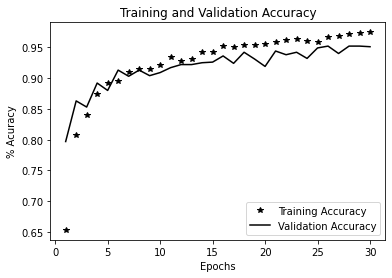

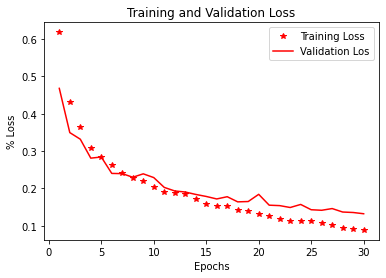

In [ ]:
acc  = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1 )

plt.plot(epochs, acc, 'k*', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'k', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('% Acuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r*', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Los')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('% Loss')
plt.legend()


plt.show()


In [ ]:
model.save('cats_dog_final.h5')

In [ ]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
img_path = '/content/gdrive/MyDrive/Kaggle/Dog_and_Cat/test/10021.jpg'
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

print('image shape {}'.format(img_tensor.shape))

image shape (1, 150, 150, 3)


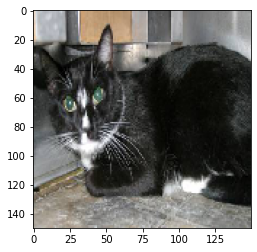

In [ ]:
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]

In [ ]:
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
len(activations)

8

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 72, 72, 64) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 36, 36, 64) dtype=float32 (created by layer 'max_pooling2d_5')>,
 <KerasTensor: shape=(None, 34, 34, 128) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'max_pooling2d_6')>,
 <KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_7')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'max_pooling2d_7')>]

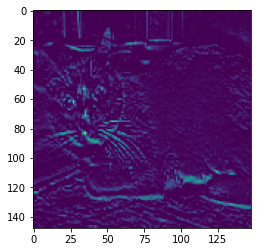

In [ ]:
plt.imshow(first_layer_activation[0,:,:,8], cmap='viridis')

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
image_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]

  n_cols = n_features //image_per_row
  display_grid = np.zeros(shape=(size*n_cols, image_per_row*size))

  for col in range(n_cols):
    for row in range(image_per_row):
      channel_image = layer_activation[0,:,:, col*image_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image*= 64
      channel_image += 164
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')

      display_grid[col*size : (col+1)*size, 
                   row*size : (row+1)*size] = channel_image

  scale = 1./size
  plt.figure(figsize = (scale*display_grid.shape[1], scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, cmap = 'viridis')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# GRAD CAM
import tensorflow as tf
from tensorflow.keras import backend as K
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input,  decode_predictions
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
model = VGG16(weights='imagenet', include_top=True)   # note that all 3 dense FC layers are included 


image_path = '/content/drive/MyDrive/Kaggle/Dog_and_Cat/test/10086.jpg'
img = image.load_img(image_path, target_size = (224,224))
img = image.img_to_array(img) # float32 Numpy array of shape(244,244,3)
img = np.expand_dims(img, axis=0) # add batch to the image (1,244,244,3)
print('image shape {}'.format(img.shape))

image shape (1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


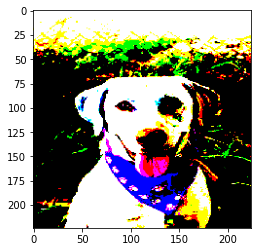

In [ ]:
# Preprocess the batch as per the VGG16 network it will do color normalization
img = preprocess_input(img)
plt.imshow(img[0])  # check image after preprocesssing

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
preds = model.predict(img)

print('Predicted: {}'.format(decode_predictions(preds, top=3)[0]))

Predicted: [('n02099712', 'Labrador_retriever', 0.5975891), ('n02088364', 'beagle', 0.10972405), ('n02089973', 'English_foxhound', 0.030879127)]


In [ ]:
np.argmax(preds[0])  # class index is 208 in 1,1000 array

208

In [ ]:
# lab_dog_output = model.output[:, 208]
# last_conv_layer = model.get_layer('block5_conv3')
# last_conv_layer

In [ ]:
# A model that maps the input image to the activations of the last conv layer as well as the output predictions
grad_model = tf.keras.models.Model([model.input], 
                                   [model.get_layer('block5_conv3').output, model.output])
# compute the gradient of the top predicted class for the input image wrt the activations of the last conv layer

with tf.GradientTape() as tape:
  last_conv_layer_output, preds = grad_model(img)
  pred_index = tf.argmax(preds[0])
  class_channel = preds[:, pred_index]


# this is the gradient of the output neuron (top predicted form the model) with regards to the output features of the last conv layer
grads = tape.gradient(class_channel, last_conv_layer_output)


In [ ]:
grads.shape

TensorShape([1, 14, 14, 512])

In [ ]:
pooled_grad = tf.reduce_mean(grads, axis=(0,1,2), keepdims=False)

pooled_grad.shape

TensorShape([512])

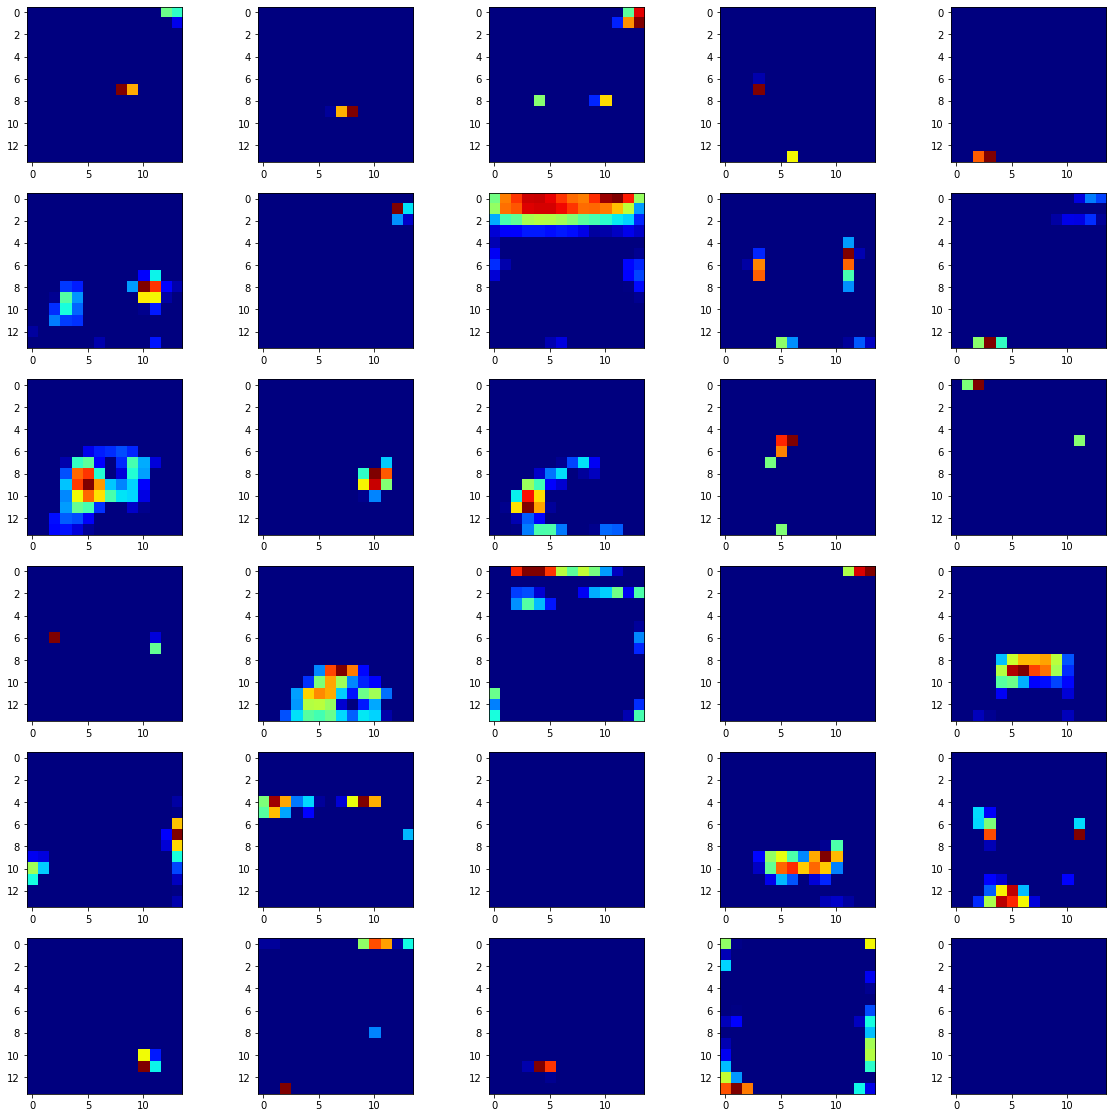

In [ ]:


# 512 activation layer of last con layer output
plt.figure(figsize=(20,20))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(last_conv_layer_output[0, :, :, i], cmap='jet')
plt.show()

In [ ]:
test = last_conv_layer_output @ pooled_grad[..., np.newaxis]
test.shape

TensorShape([1, 14, 14, 1])

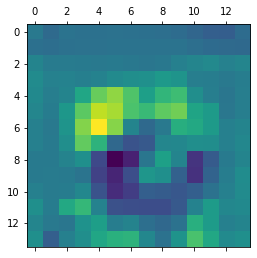

In [ ]:
# we multiply each channek in the features map array by how important this channel us with regards to the top predicted class
# then sum all to the channel to obtain the heatmap class activation

last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grad[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

plt.matshow(heatmap)
plt.show()

In [ ]:
heatmap.shape

TensorShape([14, 14])

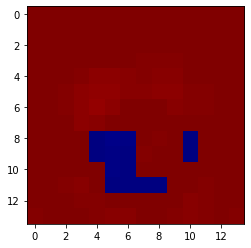

In [ ]:
heatmap =np.uint8(255*heatmap)
plt.imshow(heatmap)

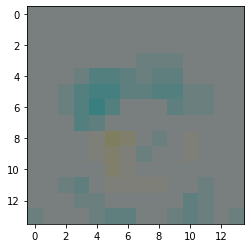

In [ ]:
from matplotlib import cm
jet = cm.get_cmap('jet')

jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

plt.imshow(jet_heatmap[:,:,:,2])

In [ ]:
img_test= image.load_img(image_path)
img_test = image.img_to_array(img_test)
jet_heatmap = image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize(img_test.shape[1], img_test.shape[0])
jet_heatmap = image.img_to_array(jet_heatmap)

jet_heatmap

ValueError: ignored

In [ ]:
type(heatmap)

numpy.ndarray

In [ ]:
heatmap_image = image.array_to_img(heatmap)
heatmap_image = heatmap_image.resize((img_test.shape[1], img_test.shape[0]))
heatmap_image = image.img_to_array(heatmap_image)

In [ ]:
img_test.shape

(500, 374, 3)

In [ ]:
heatmap_image.shape

(500, 374, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


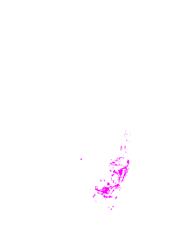

In [ ]:
alpha = 0.7
blended = cv2.addWeighted(img_test, alpha, heatmap_image, 1-alpha, 0)
#plt.imshow (cv2.cvtColor (blended, cv2.COLOR_BGR2RGB))
plt.axis ('off')
plt.imshow (blended)